In [2]:
# data pre-processing
import pandas as pd
from sklearn.model_selection import train_test_split

dataset = pd.read_csv('day.csv')
# pick six features ('weekday','workingday','temp','atemp','hum','windspeed')
x_data = dataset[['weekday','workingday','temp','atemp','hum','windspeed']]
y_data = dataset['cnt']
x_data = x_data.values
y_data = y_data.values
import numpy as np
from numpy import linalg as LA
import math

In [3]:
print(x_data.shape)
print(y_data.shape)

(731, 6)
(731,)


In [4]:
# define minibatch_gd function
import math
def minibatch_gradient_descent(X, y, w, lr, batch_size,a):
    #training_MSE_list for drawing and showing the gd performance on training dataset
    training_MSE_list = np.zeros(n)
    for irr_num in range(n):
        cost = 0
        indices = np.random.permutation(data_num)
        X = X[indices]
        y = y[indices]
        # select data point in the limit of batch_size
        batch_number = data_num/batch_size
        for i in range(0, data_num, batch_size):
            X_i = X[i:i + batch_size]
            y_i = y[i:i + batch_size]
            # prediction is the Y_predict
            prediction = np.dot(X_i, w)
            w = w - lr * ((2 / data_num) * X_i.T.dot((prediction - y_i))+a*w)
            delta_y = np.dot(X_i, w)-y_i
            cost += math.pow(LA.norm(delta_y, ord=2),2)/(2*data_num*batch_number)+ 0.5*a*LA.norm(w, ord=2)
        training_MSE_list[irr_num] = cost
    return w, training_MSE_list

In [5]:
# using training_data and perform minibatch_gd and draw a picture and take a look
lr = 0.01
n = 200
batch_size = 32
# a is the hyperparameter to determind Ridge regression model
a_list = [0,0.1,0.5,1,5]


In [6]:
# k-fold cross validation
from sklearn.model_selection import KFold
kf = KFold(n_splits=5,shuffle=True)
total_training_MSE_list = np.zeros((n, 1))
total_5fold_w = np.zeros((6, 1)) #sum of 5-folds w for averaging.

In [9]:
index = 0  #index is the indice for w and mse. such as index=0 means the w and mse for a= 0, 1 -> a = 0.1 ,etc
MSE_list = np.zeros((5, 200))
w_list = np.zeros((5, 6))
for a in a_list:
    avg_test_mst = 0
    
#     use the kfold to split dataset
    for train_index, test_index in kf.split(x_data):
        x_train,x_test = x_data[train_index],x_data[train_index]
        y_train,y_test = y_data[train_index],y_data[train_index]
        y_train_matrix = y_train.reshape((-1, 1))
        data_num, feature_num = x_train.shape
        w = np.zeros((feature_num, 1))
        # run minibatch_gradient_descent function and get predict_parameter w and a cost for drawing gd performance
        w_star, training_MSE_list = minibatch_gradient_descent(x_train, y_train_matrix, w, lr,batch_size,a)
        training_MSE_list = training_MSE_list.reshape((-1, 1))
        total_5fold_w +=w_star
        total_training_MSE_list +=training_MSE_list
        
        #use w* in testing dataset to evaluate model and determine a
        y_test = y_test.reshape((-1, 1))
        wx_minus_y = x_test.dot(w_star) - y_test
        testdata_num, testdata_feature = x_test.shape
        avg_test_mst += (math.pow(LA.norm(wx_minus_y, ord=2), 2) / testdata_num) + (0.5 * a * LA.norm(w_star, ord=2))
    print("mse for Ridge regression model with a = {0} is {1}".format(a,avg_test_mst/5))
    
    #get the average mse and w* for each a
    average_training_MSE_list = total_training_MSE_list/5
    average_5fold_w = total_5fold_w/5
    average_training_MSE_list = average_training_MSE_list.transpose()
    average_5fold_w = average_5fold_w.transpose()
    #store w* and mse in array for drawing 
    MSE_list[index] =average_training_MSE_list
    w_list[index] = average_5fold_w
    index +=1

mse for Ridge regression model with a = 0 is 3195626.9381167023
mse for Ridge regression model with a = 0.1 is 5746816.013921762
mse for Ridge regression model with a = 0.5 is 8663127.353169871
mse for Ridge regression model with a = 1 is 10636409.268992135
mse for Ridge regression model with a = 5 is 17823226.701874144


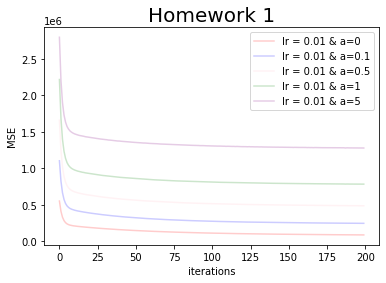

In [8]:
x_list = range(n)
import matplotlib.pyplot as plt
plt.xlabel('iterations')
plt.ylabel('MSE')
plt.plot(x_list, MSE_list[0], alpha=0.2, label='lr = 0.01 & a=0 ', color='red')
plt.plot(x_list, MSE_list[1], alpha=0.2, label='lr = 0.01 & a=0.1', color='blue')
plt.plot(x_list, MSE_list[2], alpha=0.2, label='lr = 0.01 & a=0.5', color='pink')
plt.plot(x_list, MSE_list[3], alpha=0.2, label='lr = 0.01 & a=1', color='green')
plt.plot(x_list, MSE_list[4], alpha=0.2, label='lr = 0.01 & a=5', color='purple')

plt.title('Homework 1', fontsize=20)
plt.legend()
plt.show()